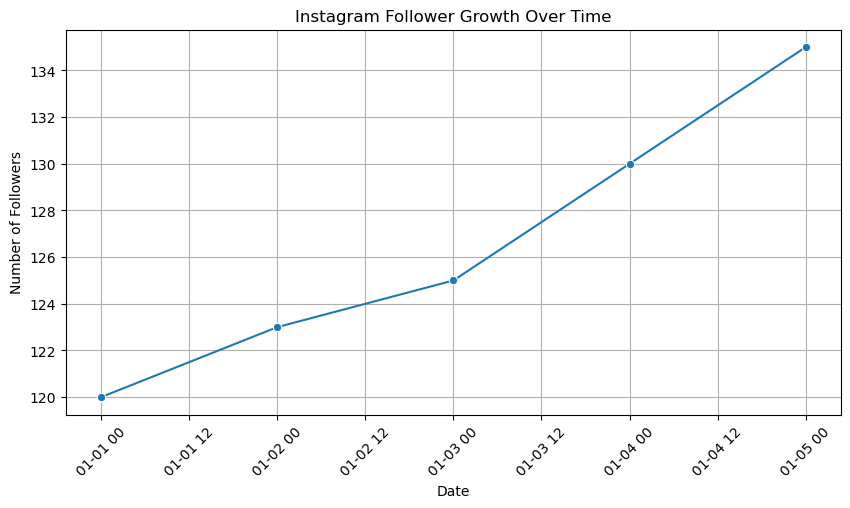

c:\Users\SAHITI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


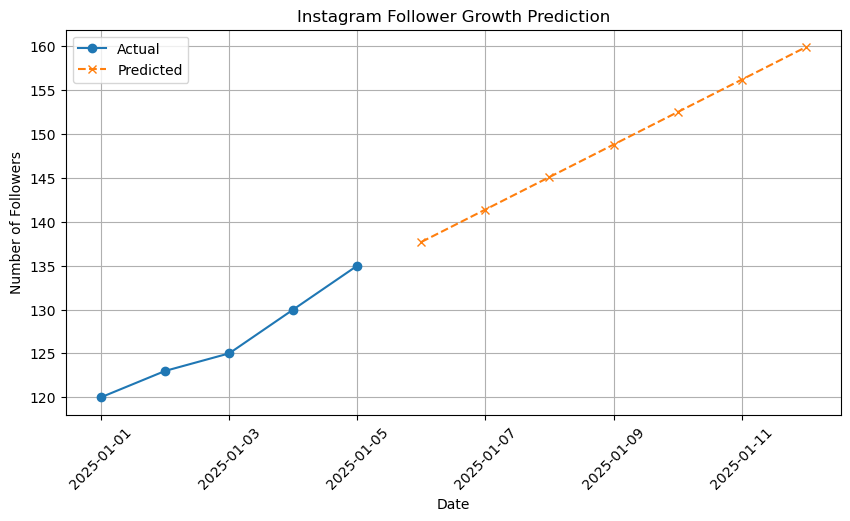

In [2]:
# ------------------------------
# Instagram Follower Analysis
# ------------------------------

# Make sure plots show inside Jupyter
%matplotlib inline

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# ------------------------------
# Load dataset
# ------------------------------
csv_path = r"C:\Users\SAHITI\Documents\Instagram_Follower_Analysis\followers.csv"
df = pd.read_csv(csv_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# ------------------------------
# Plot follower growth over time
# ------------------------------
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date', y='followers', marker='o')
plt.title("Instagram Follower Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Followers")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ------------------------------
# Predict future followers using simple linear regression
# ------------------------------
# Convert dates to numerical values (days since first date)
df['days'] = (df['date'] - df['date'].min()).dt.days
X = df[['days']]
y = df['followers']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict next 7 days
future_days = np.array(range(df['days'].max() + 1, df['days'].max() + 8)).reshape(-1,1)
future_preds = model.predict(future_days)

# Create future dates for plotting
future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=7)

# ------------------------------
# Plot actual + predicted follower growth
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['followers'], marker='o', label='Actual')
plt.plot(future_dates, future_preds, marker='x', linestyle='--', label='Predicted')
plt.title("Instagram Follower Growth Prediction")
plt.xlabel("Date")
plt.ylabel("Number of Followers")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
